In [111]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
def f(x):
    return 3*x**2 -4*x + 5

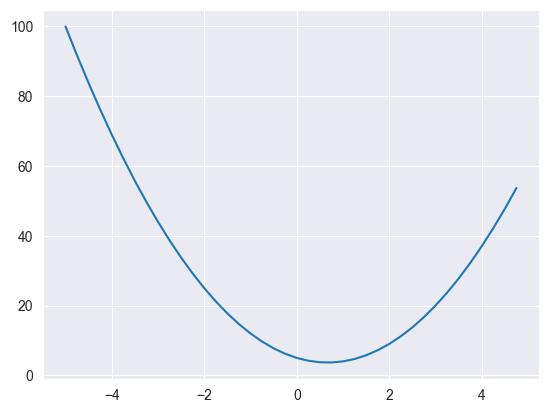

In [113]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

[What is the derivative of this function at any x](https://en.wikipedia.org/wiki/Derivative)
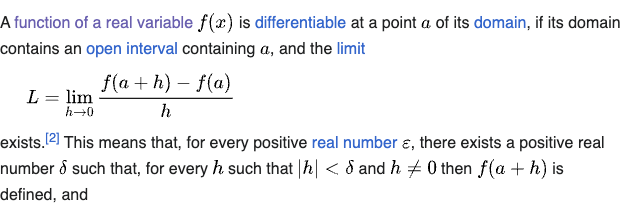

In [114]:
# an example of a small derivative
h = .0001
x = 3.0
x1 = f(x)
x2 = f(x + h)
print(f"x1 = {x1}")
print(f"x2 = {x2}")
# The derivative is how much f(x) cha
(x2 - x1 ) / h

x1 = 20.0
x2 = 20.001400030000006


14.000300000063248

In [115]:
# We get a little more complex
a = 2.0
b = -3.0
c = 10
d = a*b + c
d

4.0

In [116]:
h = 0.0001
#inputs
d1 = a * b + c
a += h
d2 = a * b + c # we bump a by h
print('d1',  d1)
print('d2', d2)
print('slope ', (d2 -d1) / h)
# We need to understand the effect of h on a, b or c and how sensitive d is to changes in a, bc,


d1 4.0
d2 3.999699999999999
slope  -3.000000000010772


## Start coding Micrograd

In [117]:
class Value:
    def __init__(self, data, _children=(), _op="", label=''):
        self.data = data
        self.grad = 0.0  # Initialize gradient to zero
        self._prev = set(_children) #linked list functionality empty by default but gets populated when we perform an operation with the class
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+') # pointer to the values that caused the op
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

In [118]:
a = Value(2, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b  # This already returns a Value object
e.label = 'e'
d = e + c  # This already returns a Value object
d.label = 'd'

In [119]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

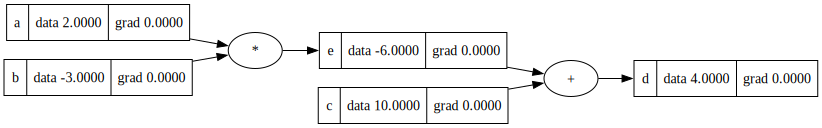

In [123]:
draw_dot(d)